In [2]:
!pip install yfinance

# Import Libraries

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [65]:
# the code take historical price data for Bitcoin, Ethereum, Tether, Binance coin
# this cleaned data can then be used for further analysis or machine learning

btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
print(prices1.head())

                                   Open          High           Low  \
Date                                                                  
2020-09-15 00:00:00+00:00  10677.754883  10938.631836  10656.459961   
2020-09-16 00:00:00+00:00  10797.761719  11100.124023  10704.884766   
2020-09-17 00:00:00+00:00  10973.251953  11037.420898  10774.627930   
2020-09-18 00:00:00+00:00  10951.820312  11034.908203  10829.657227   
2020-09-19 00:00:00+00:00  10933.752930  11134.092773  10909.618164   

                                  Close       Volume  Dividends  Stock Splits  
Date                                                                           
2020-09-15 00:00:00+00:00  10796.951172  32509451925        0.0           0.0  
2020-09-16 00:00:00+00:00  10974.905273  30769986455        0.0           0.0  
2020-09-17 00:00:00+00:00  10948.990234  38151810523        0.0           0.0  
2020-09-18 00:00:00+00:00  10944.585938  26341903912        0.0           0.0  
2020-09-19 00:00:00+00

In [66]:
 btc = yf.Ticker('BTC-USD')
 prices1 = btc.history(period='5y')
 prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1,inplace=True)

 eth = yf.Ticker('ETH-USD')
 prices2 =eth.history(period='5y')
 prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1, inplace=True)

 usdt = yf.Ticker('USDT-USD')
 prices3 = usdt.history(period='5y')
 prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1, inplace=True) 

 bnb = yf.Ticker('BNB-USD')
 prices4 = bnb.history(period='5y')
 prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis =1, inplace=True)

In [67]:
# The parameters lsuffix and rsuffix in the join method are used to add suffixes 
# to overlapping column names. This is necessary to avoid column name conflicts 
# when the two DataFrames being joined have the same column names.

p1 = prices1.join(prices2, lsuffix= '(BTC)', rsuffix= '(ETH)')
p2 = prices3.join(prices4, lsuffix = '(USDT)', rsuffix = '(BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [68]:
data.head()

,Close(BTC),Volume(BTC),Close(ETH),Volume(ETH),Close(USDT),Volume(USDT),Close(BNB),Volume(BNB)
Date,,,,,,,,
2020-09-15 00:00:00+00:00,10796.951172,32509451925,364.839203,16140584321,1.002487,49718173930,27.202391,861821910
2020-09-16 00:00:00+00:00,10974.905273,30769986455,365.812286,16107612177,1.003444,50682289026,27.964594,664539530
2020-09-17 00:00:00+00:00,10948.990234,38151810523,389.019226,19899531080,1.001878,51695424541,26.993130,512578971
2020-09-18 00:00:00+00:00,10944.585938,26341903912,384.364532,14108357740,0.999502,47248825663,27.399481,482149967
2020-09-19 00:00:00+00:00,11094.346680,22764204008,385.544373,11049507684,1.002017,37361830219,27.251112,331216806


In [69]:
data.tail()

,Close(BTC),Volume(BTC),Close(ETH),Volume(ETH),Close(USDT),Volume(USDT),Close(BNB),Volume(BNB)
Date,,,,,,,,
2025-09-11 00:00:00+00:00,115507.539062,45685065332,4461.233398,35959212991,1.000266,121507255807,902.983337,2250551806
2025-09-12 00:00:00+00:00,116101.578125,54785725894,4715.246094,43839753626,1.000618,141338448172,925.030701,2648100391
2025-09-13 00:00:00+00:00,115950.507812,34549454947,4668.179688,34843845977,1.000319,119042646333,933.899658,2744192106
2025-09-14 00:00:00+00:00,115407.656250,32798036057,4609.597656,28394160275,1.000528,105982674402,927.241699,2338327311
2025-09-15 00:00:00+00:00,116292.226562,36105129984,4638.795410,29889947648,1.000242,109613940736,928.618530,2275071488


In [70]:
data.shape

(1827, 8)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-09-15 00:00:00+00:00 to 2025-09-15 00:00:00+00:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close(BTC)    1827 non-null   float64
 1   Volume(BTC)   1827 non-null   int64  
 2   Close(ETH)    1827 non-null   float64
 3   Volume(ETH)   1827 non-null   int64  
 4   Close(USDT)   1827 non-null   float64
 5   Volume(USDT)  1827 non-null   int64  
 6   Close(BNB)    1827 non-null   float64
 7   Volume(BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.5 KB


In [72]:
data.isna().sum()

Close(BTC)      0
Volume(BTC)     0
Close(ETH)      0
Volume(ETH)     0
Close(USDT)     0
Volume(USDT)    0
Close(BNB)      0
Volume(BNB)     0
dtype: int64

In [73]:
data.describe()

,Close(BTC),Volume(BTC),Close(ETH),Volume(ETH),Close(USDT),Volume(USDT),Close(BNB),Volume(BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,49381.049738,3.571269e+10,2352.957776,1.842940e+10,1.000187,6.662812e+10,400.829782,1.660128e+09
std,28132.296595,2.156619e+10,983.812313,1.191763e+10,0.000736,4.142997e+10,197.935368,1.347777e+09
min,10246.186523,5.331173e+09,321.116302,2.081626e+09,0.995872,9.989859e+09,22.856977,2.038465e+08
25%,27079.968750,2.136936e+10,1650.618042,1.024022e+10,0.999922,3.915764e+10,265.174362,7.000732e+08
50%,42451.789062,3.115874e+10,2265.692139,1.581725e+10,1.000157,5.712114e+10,349.253723,1.489889e+09
75%,63867.521484,4.430770e+10,3109.723022,2.292441e+10,1.000430,8.191751e+10,579.920197,2.062346e+09
max,123344.062500,3.509679e+11,4831.348633,9.245355e+10,1.011530,3.006686e+11,933.899658,1.798295e+10


# Exploratory Data Analysis

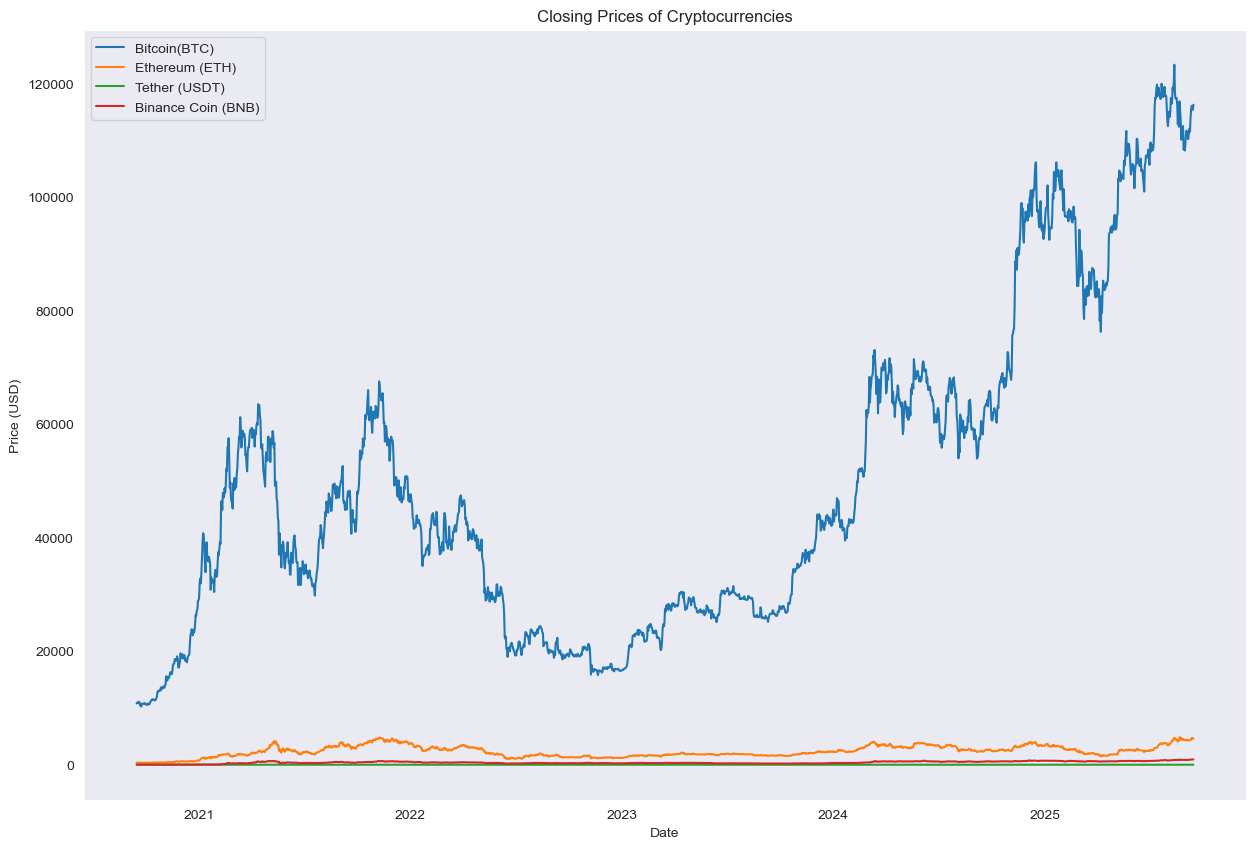

In [74]:
# visualize the close prices

plt.figure(figsize=(15,10))
plt.plot(data.index, data['Close(BTC)'], label='Bitcoin(BTC)')
plt.plot(data.index, data['Close(ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close(USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close(BNB)'], label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

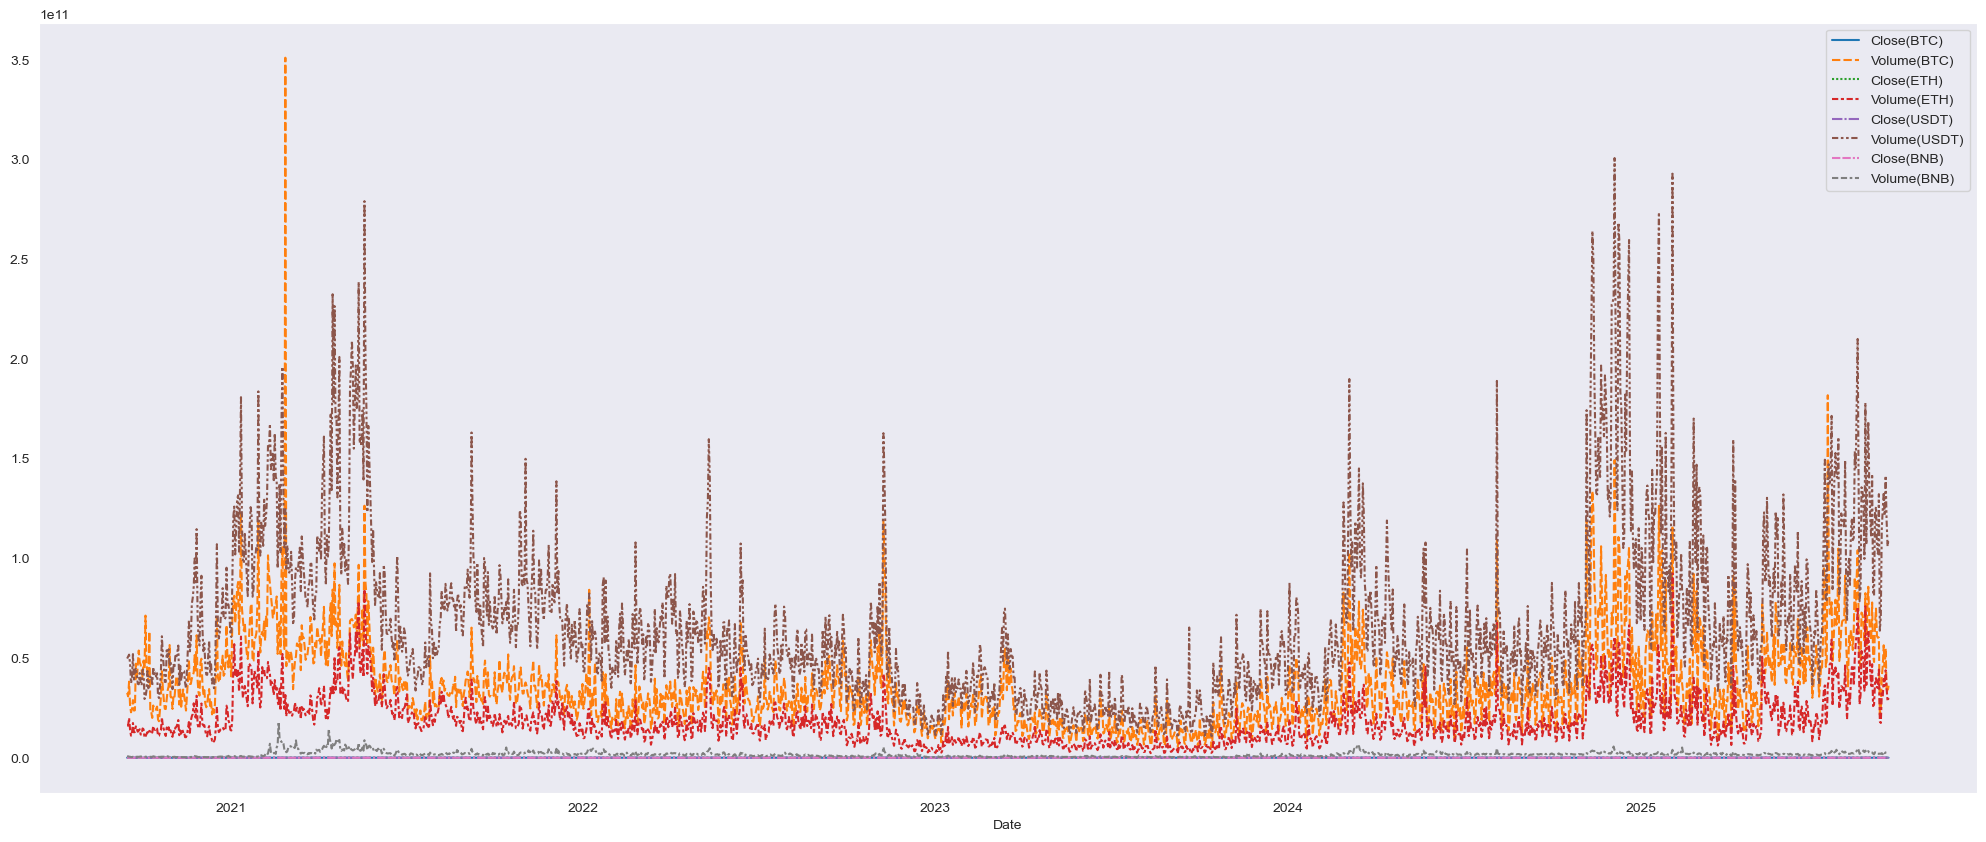

In [75]:
plt.figure(figsize=(25,10))
sns.set_style('dark')
sns.lineplot(data=data)

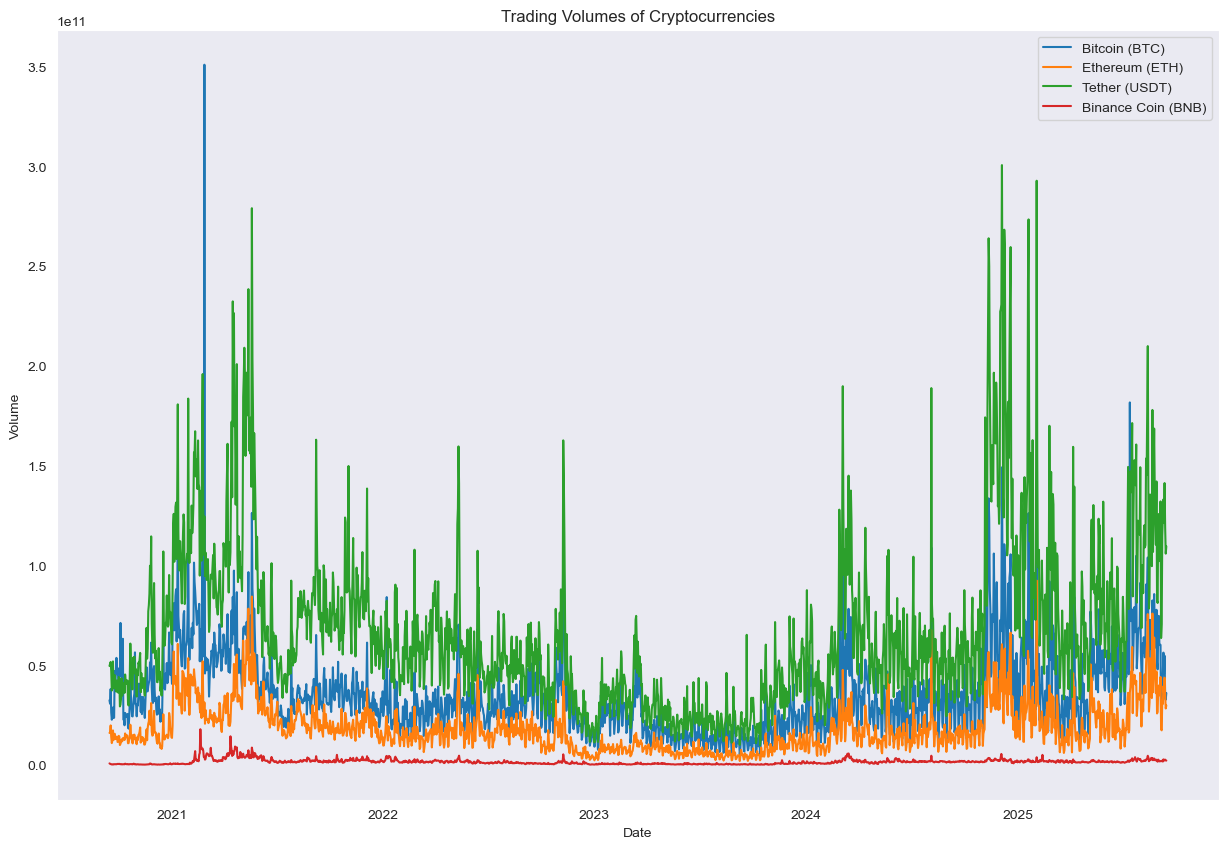

In [76]:
# visualize the trading volumes of all four cryptocurrencies

plt.figure(figsize=(15, 10))
plt.plot(data.index, data['Volume(BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume(ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume(USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume(BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

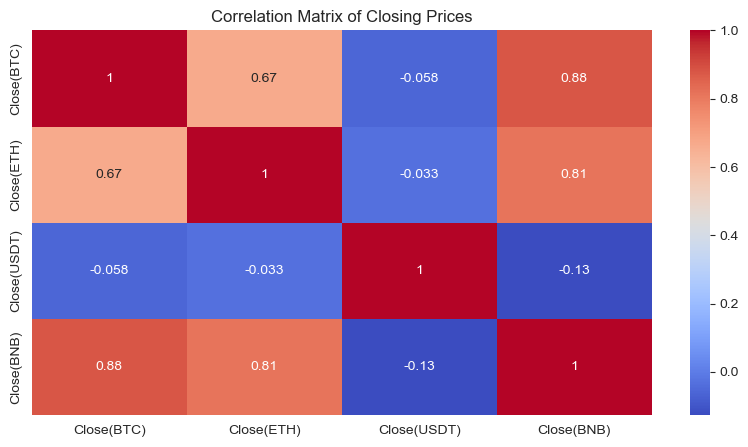

In [77]:
# correlation analysis between closing prices of the cryptocurrencies

corr_matrix = data[['Close(BTC)', 'Close(ETH)', 'Close(USDT)', 'Close(BNB)']].corr()

# plot the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Closing Prices')
plt.show()

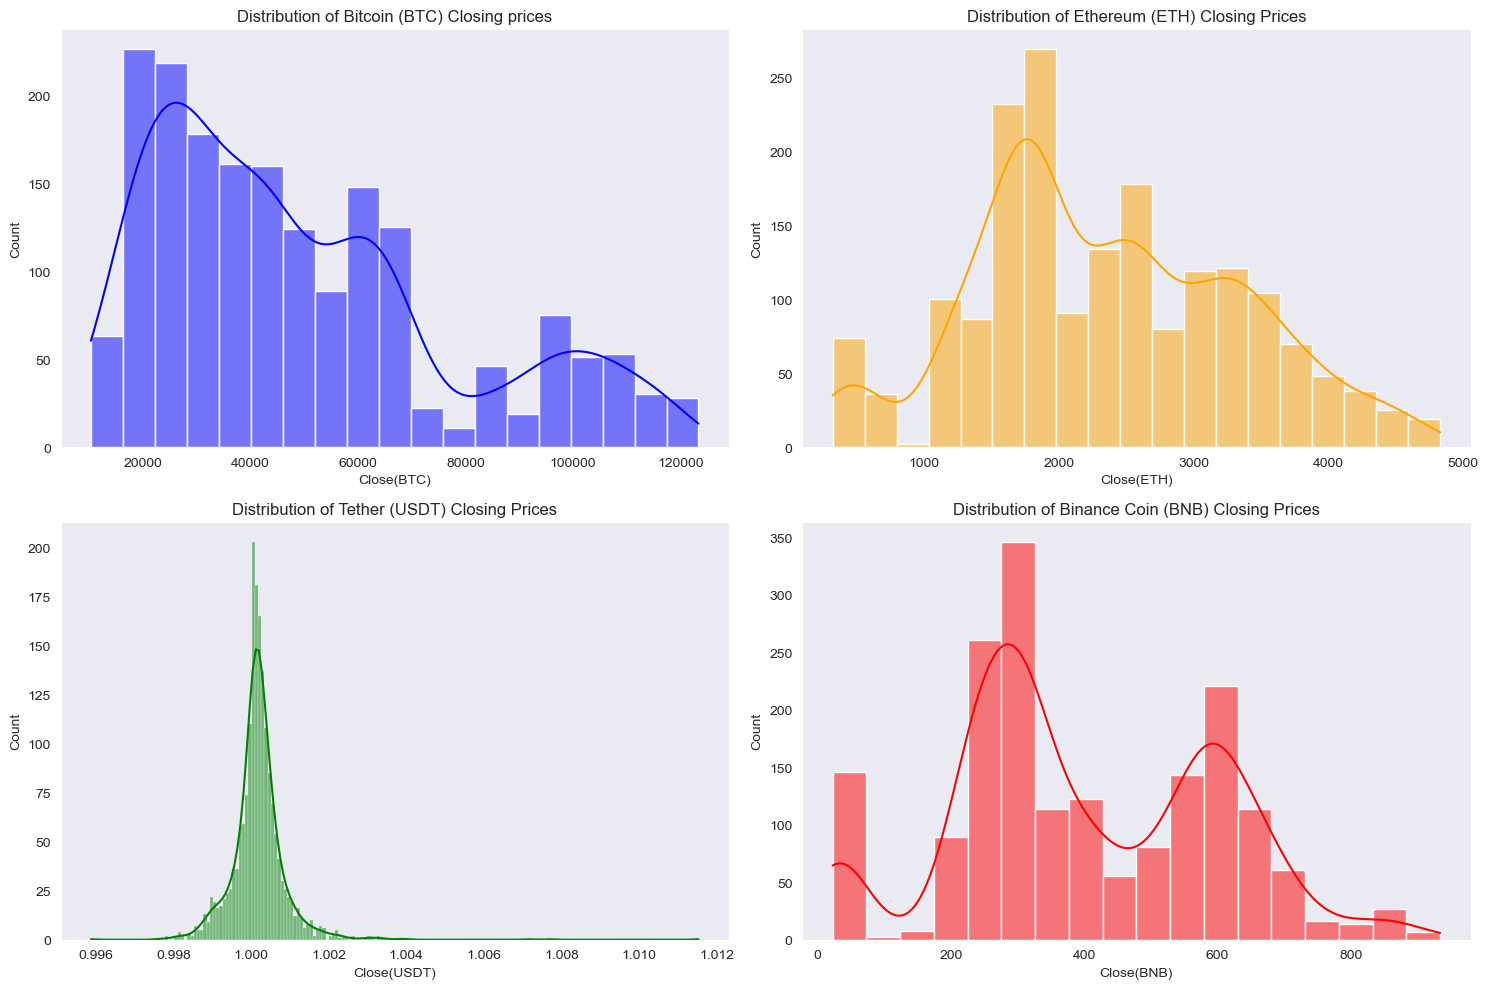

In [78]:
# plot the distribution of closing prices for each crptocurrency

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(data['Close(BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close(ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close(USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close(BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Close(BTC)'}>,
        <Axes: title={'center': 'Volume(BTC)'}>,
        <Axes: title={'center': 'Close(ETH)'}>,
        <Axes: title={'center': 'Volume(ETH)'}>],
       [<Axes: title={'center': 'Close(USDT)'}>,
        <Axes: title={'center': 'Volume(USDT)'}>,
        <Axes: title={'center': 'Close(BNB)'}>,
        <Axes: title={'center': 'Volume(BNB)'}>]], dtype=object)

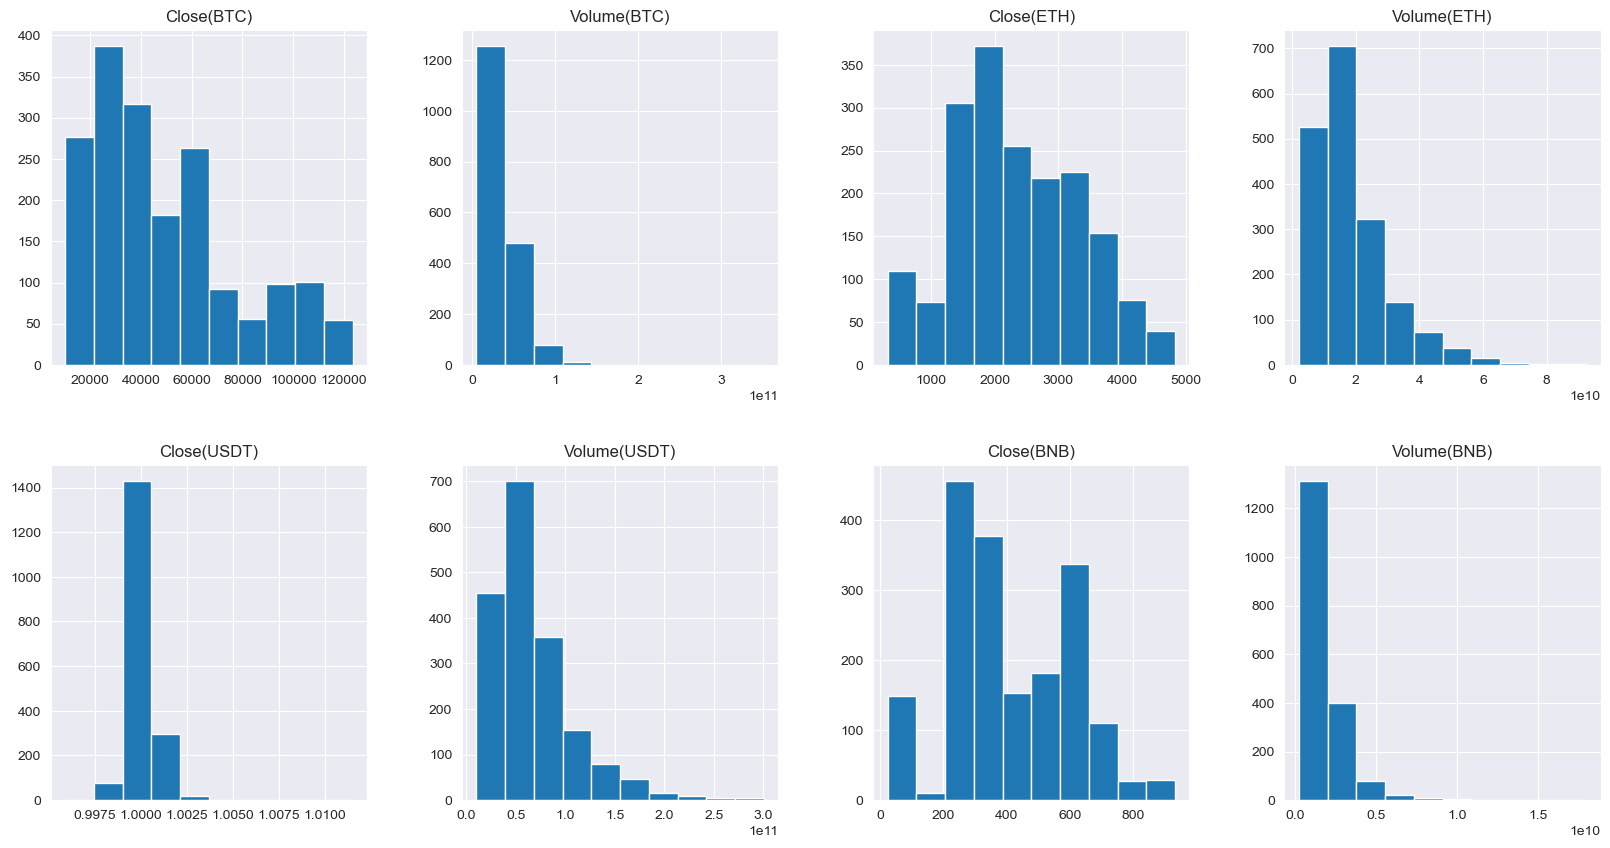

In [79]:
data.hist(figsize=(20,10), layout=(2,4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

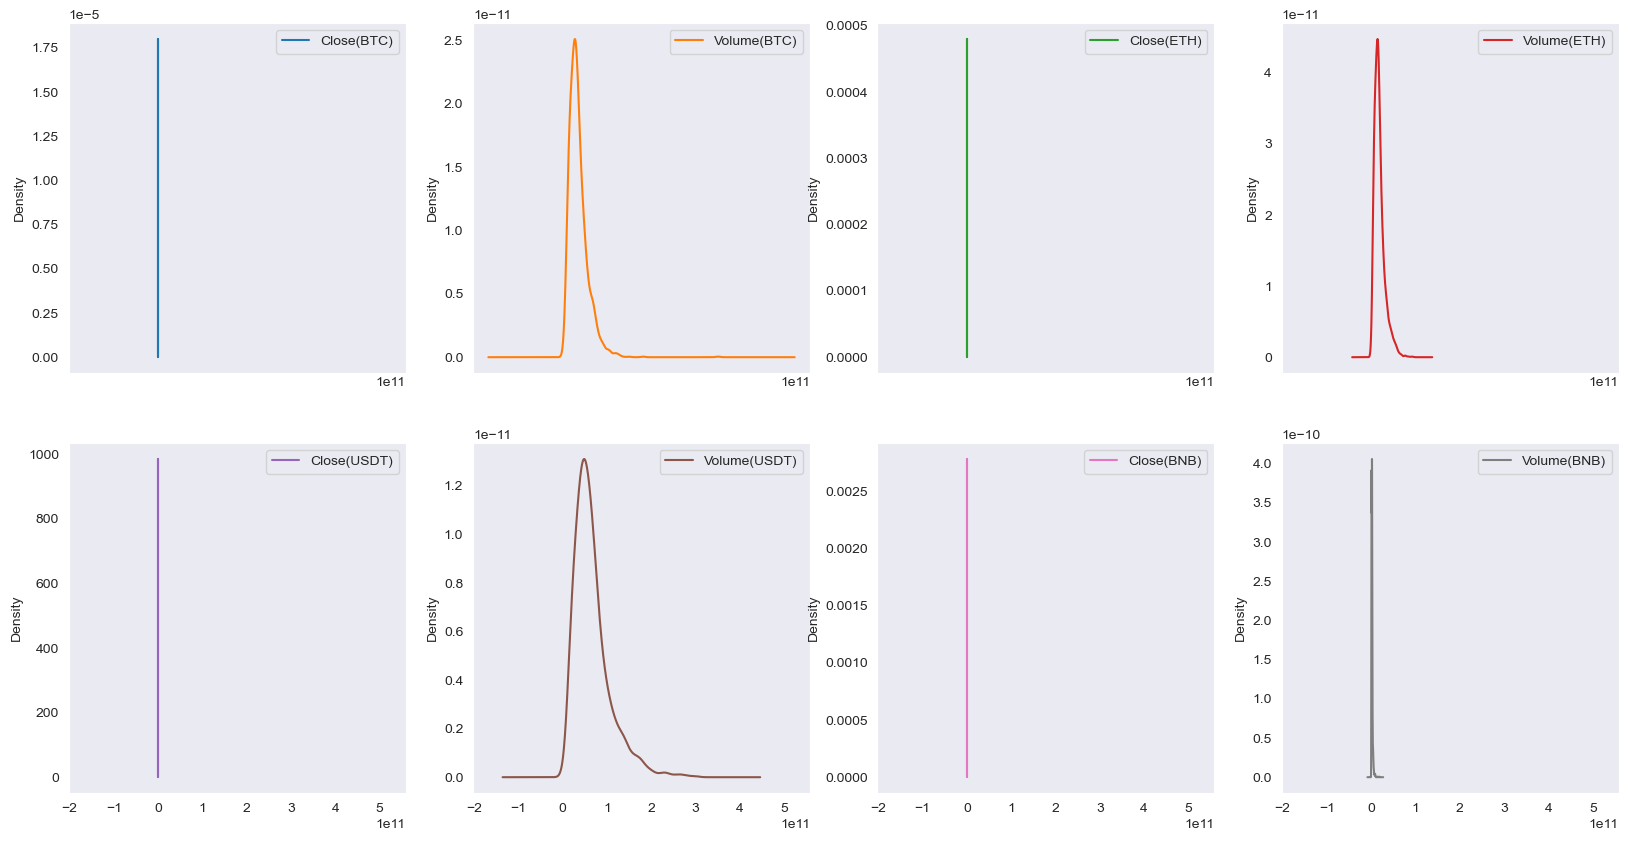

In [80]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 10))

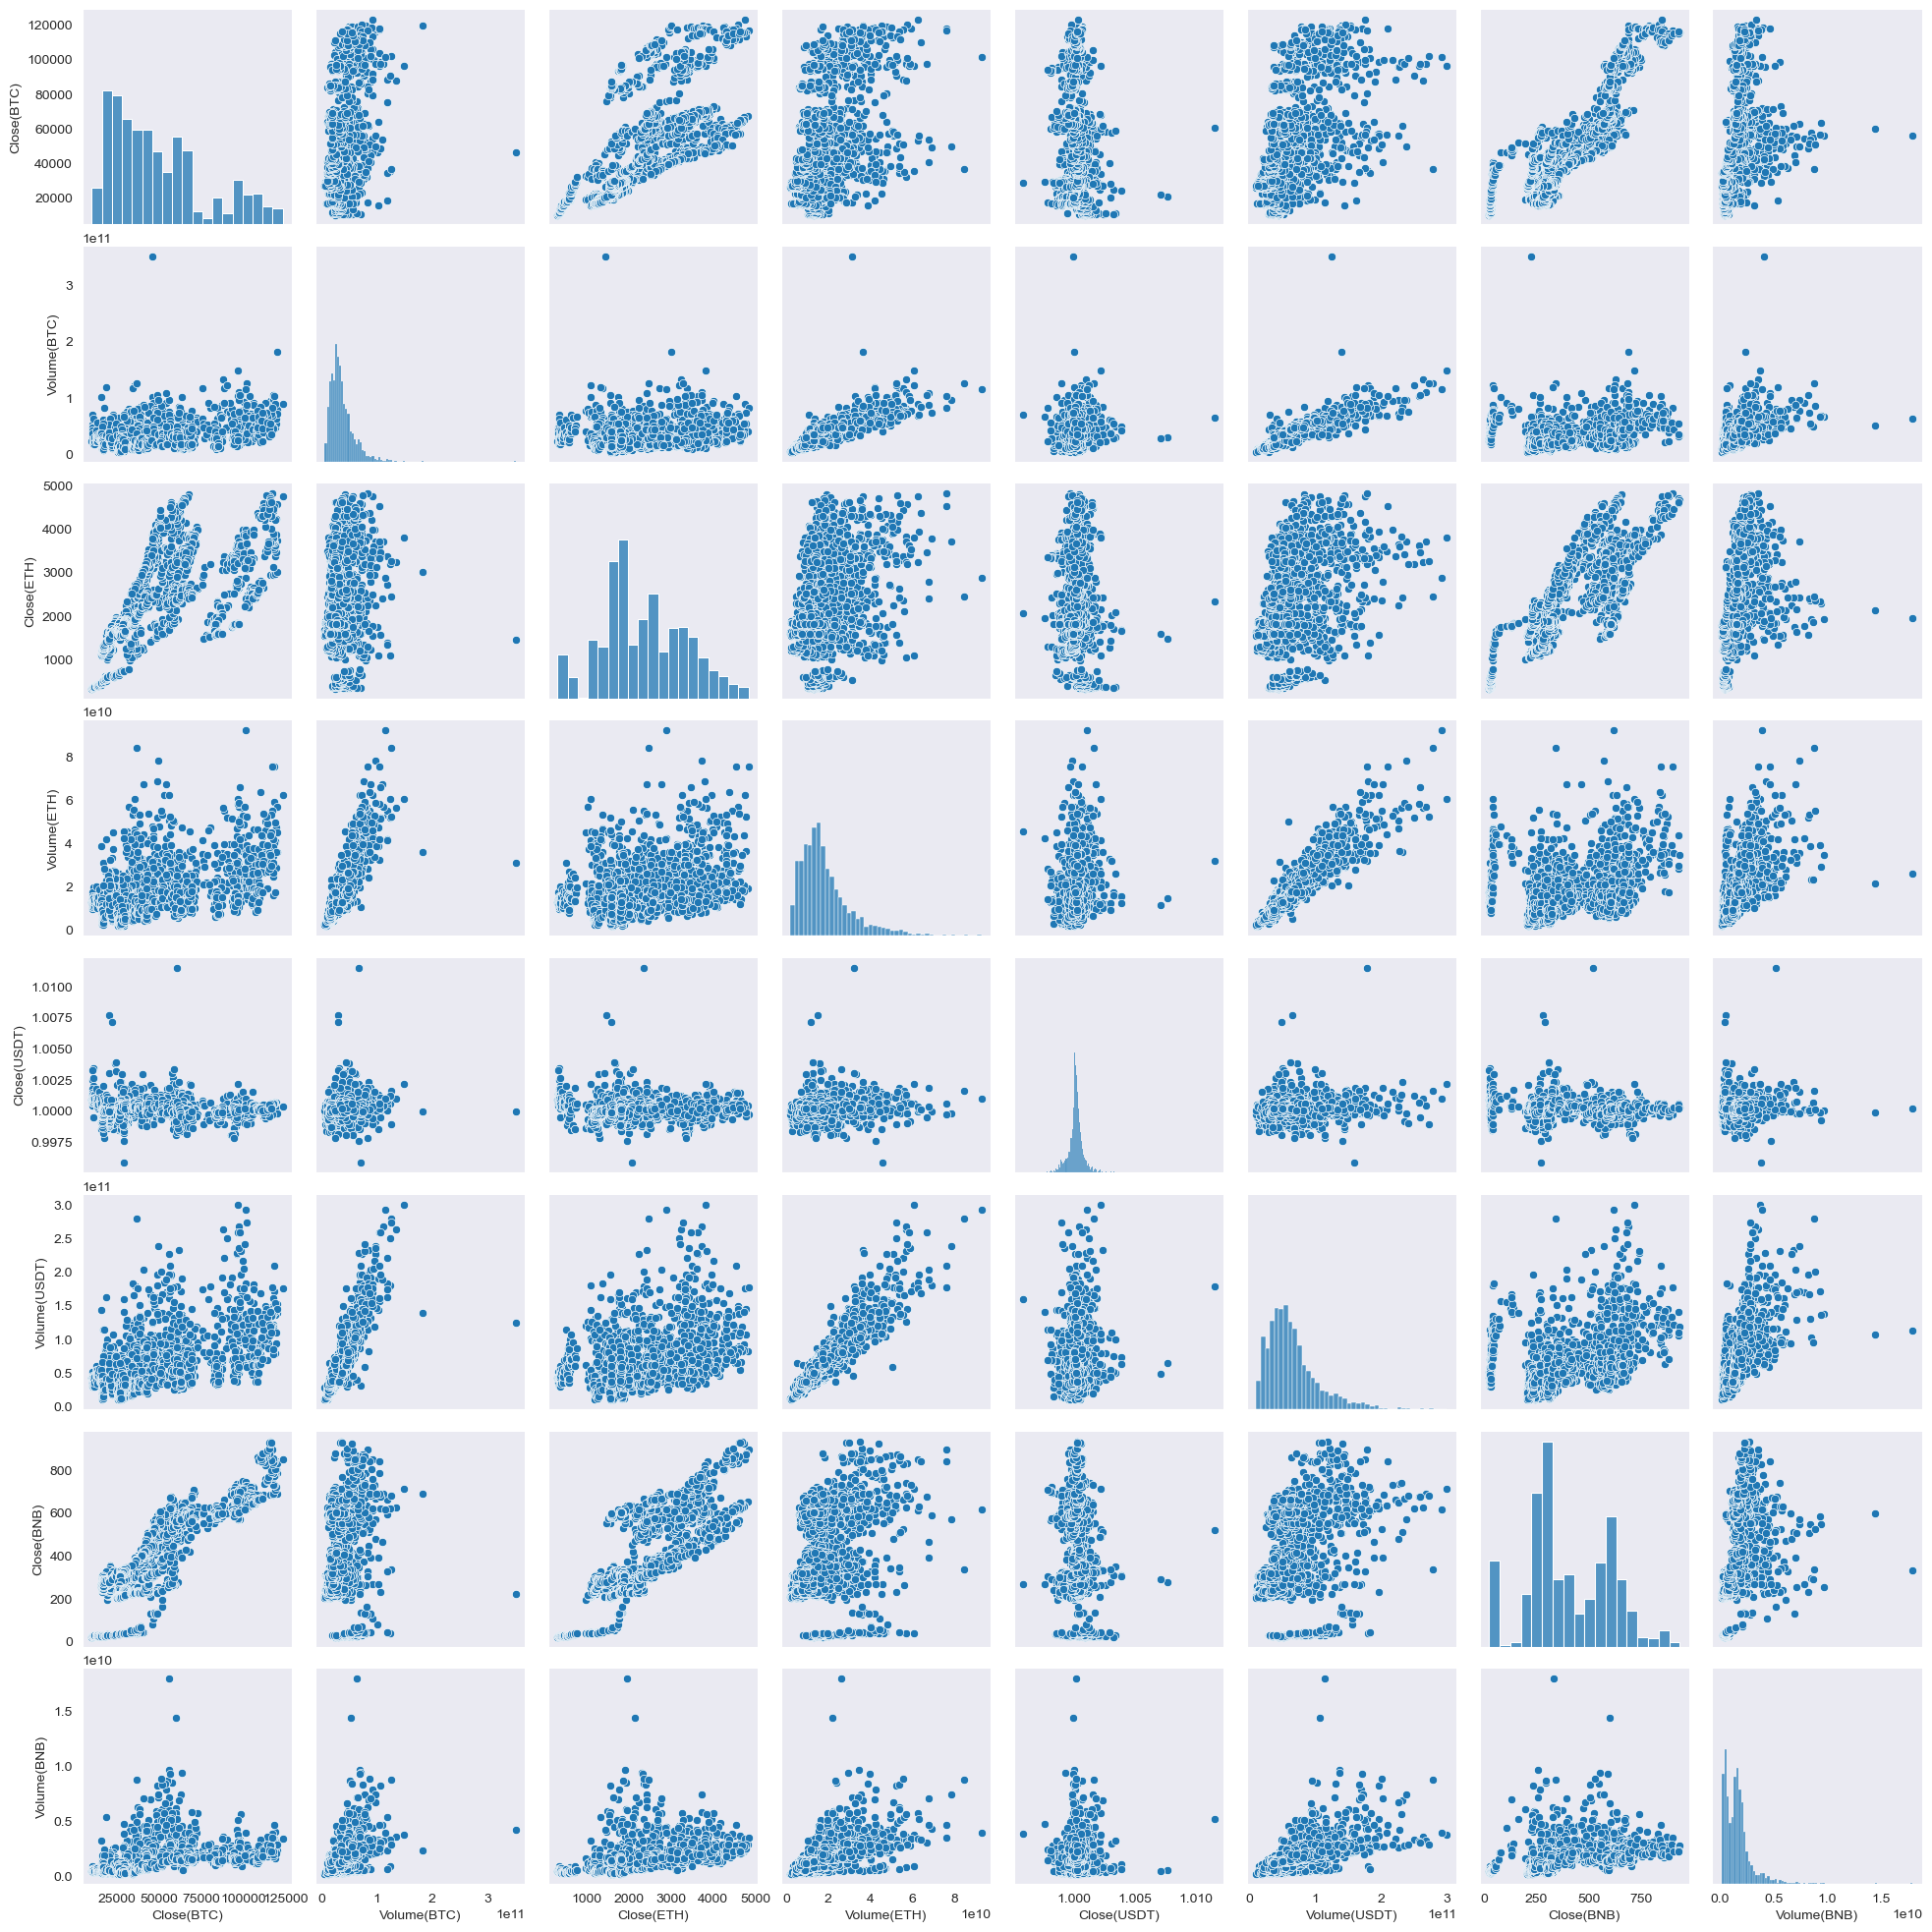

In [81]:
sns.pairplot(data)

# data split

In [82]:
X = data.drop(columns=['Close(BTC)'], axis=1)
y = data['Close(BTC)']

In [83]:
X.head()

,Volume(BTC),Close(ETH),Volume(ETH),Close(USDT),Volume(USDT),Close(BNB),Volume(BNB)
Date,,,,,,,
2020-09-15 00:00:00+00:00,32509451925,364.839203,16140584321,1.002487,49718173930,27.202391,861821910
2020-09-16 00:00:00+00:00,30769986455,365.812286,16107612177,1.003444,50682289026,27.964594,664539530
2020-09-17 00:00:00+00:00,38151810523,389.019226,19899531080,1.001878,51695424541,26.993130,512578971
2020-09-18 00:00:00+00:00,26341903912,384.364532,14108357740,0.999502,47248825663,27.399481,482149967
2020-09-19 00:00:00+00:00,22764204008,385.544373,11049507684,1.002017,37361830219,27.251112,331216806


In [84]:
y.head()

Date
2020-09-15 00:00:00+00:00    10796.951172
2020-09-16 00:00:00+00:00    10974.905273
2020-09-17 00:00:00+00:00    10948.990234
2020-09-18 00:00:00+00:00    10944.585938
2020-09-19 00:00:00+00:00    11094.346680
Name: Close(BTC), dtype: float64

In [85]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [86]:
# shapes of the resulting dataset

print(f'x_train shape: {X_train.shape}')
print(f'x_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (1461, 7)
x_test shape: (366, 7)
y_train shape: (1461,)
y_test shape: (366,)


In [87]:
#SelectKBest is a feature selection method provided by scikit-learn

from sklearn.feature_selection import SelectKBest
fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, y_train)
X_test = fs.transform(X_test)

C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [88]:
mask = fs.get_support()
selected_features = X.columns[mask]
print('Selected Features:', selected_features)

Selected Features: Index(['Close(USDT)', 'Volume(USDT)', 'Close(BNB)', 'Volume(BNB)'], dtype='object')


In [89]:
X_train

array([[1.00114000e+00, 6.20206617e+10, 3.43741028e+02, 2.14676141e+09],
       [1.00000894e+00, 9.91203763e+10, 6.24080566e+02, 5.74135805e+09],
       [9.99087989e-01, 5.85856128e+10, 3.16760559e+02, 2.22814410e+09],
       ...,
       [1.00005198e+00, 5.88728010e+10, 6.17816772e+02, 1.60017862e+09],
       [1.00041199e+00, 8.62178716e+10, 4.30390869e+02, 2.12869950e+09],
       [1.00032794e+00, 5.22673480e+10, 2.83579468e+02, 1.31353152e+09]])

In [90]:
# It's often used when data needs to be normalized within a specific range 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Import Libraries

In [91]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import math

----- Linear Regression -----
Mean Absolute Error (MAE): 9987.56868600056
Mean Squared Error (MSE): 152530253.95404702
 Root Mean Squared Error (RMSE): 12350.313921275321
R-squared: 0.8052262482557535

----- Ridge Regression -----
Mean Absolute Error (MAE): 10054.195304526174
Mean Squared Error (MSE): 152450285.73846635
 Root Mean Squared Error (RMSE): 12347.07599954201
R-squared: 0.8053283637965408

----- Lasso Regression -----
Mean Absolute Error (MAE): 9991.626611021062
Mean Squared Error (MSE): 152535039.41083372
 Root Mean Squared Error (RMSE): 12350.507658020933
R-squared: 0.8052201374590559

----- ElasticNet Regression -----
Mean Absolute Error (MAE): 20774.055550539546
Mean Squared Error (MSE): 666550126.3835561
 Root Mean Squared Error (RMSE): 25817.632083201515
R-squared: 0.1488477500310209

----- Support Vector Regression (SVR) -----
Mean Absolute Error (MAE): 21545.963361370923
Mean Squared Error (MSE): 808948333.8450534
 Root Mean Squared Error (RMSE): 28442.017049517664
R

C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


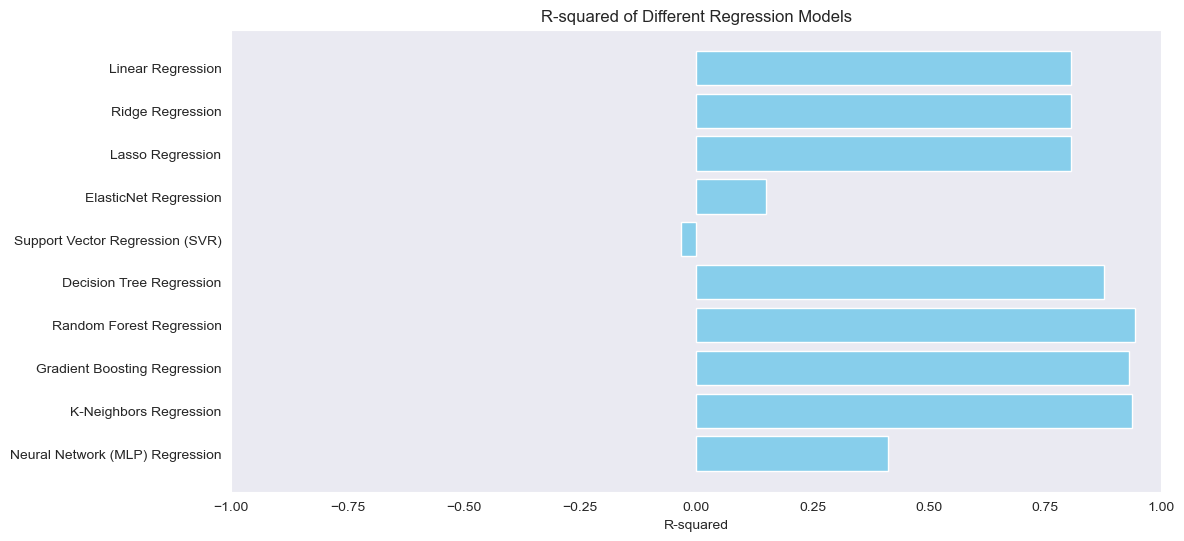

In [92]:
#Define Models and Perform Training and Evaluation
models = {
 'Linear Regression': LinearRegression(),
 'Ridge Regression': Ridge(alpha=1.0),
 'Lasso Regression': Lasso(alpha=1.0),
 'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
 'Support Vector Regression (SVR)': SVR(kernel='rbf'),
 'Decision Tree Regression': DecisionTreeRegressor(),
 'Random Forest Regression': RandomForestRegressor(n_estimators=100),
 'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100), 
 'K-Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
 'Neural Network (MLP) Regression': MLPRegressor(hidden_layer_sizes=(100, 50))}
                                                 
# Train and evaluate each model
results = {'Model': [], 'MAE':[] ,'MSE': [],'RMSE':[], 'R-squared': []}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
                                                           
    # Predict on test set
    y_pred = model.predict(X_test)
          
    # Evaluate model
    mae = mean_absolute_error(y_test, y_pred)      
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)   
    r2 = r2_score(y_test, y_pred)
      
    # Store results
    results['Model'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R-squared'].append(r2)
      
    # print results
    print(f"----- {name} -----")
    print(f"Mean Absolute Error (MAE): {mae}")  
    print(f"Mean Squared Error (MSE): {mse}")
    print(f" Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared: {r2}")
    print()
      
# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)
      
# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()

In [95]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=0)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model_rf.fit(X_train, y_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

# Save the scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the loaded model
y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Loaded Random Forest Regression - Mean Absolute Error (MAE): {mae}") 
print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - Root Mean Squared Error (MSE): {rmse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")


Loaded Random Forest Regression - Mean Absolute Error (MAE): 49.8537228251188
Loaded Random Forest Regression - Mean Squared Error (MSE): 4256.244703540662
Loaded Random Forest Regression - Root Mean Squared Error (MSE): 65.23990116133425
Loaded Random Forest Regression - R-squared: 0.7950714927684666
